# Submission
* Lab: 12
* Topic: ANN

* **Name**: Taimoor Arshad
* **CMS**: 294035
* **Class**: BESE-10B

In [ ]:
# Importing rqquired frameworks
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import itertools
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


In [ ]:
# The data is already sorted in training and test sets so assigning variables
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
# Check the shape of single example 
train_data[0].shape, train_labels[0].shape

((28, 28), ())

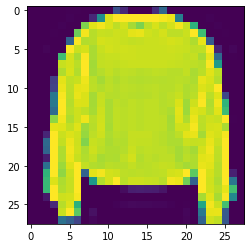

In [ ]:
# Plot a single sample

plt.imshow(train_data[7])

In [ ]:
# Check out sample_s label
train_labels[7]

2

In [ ]:
# Create a small list so we can index onto our training labels so they're human readable
class_names = ["T-Shirt/top", "Trouser","Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

len(class_names)

10

Text(0.5, 1.0, 'Shirt')

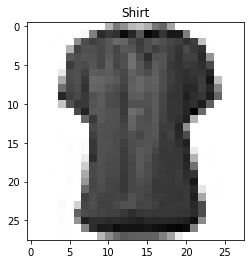

In [ ]:
# Plot an example image and its label
index_of_choice = 55
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])



In [ ]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0


In [ ]:
# Let's refit the model with ideal learning rate (0.001)

# Set the random seed
tf.random.set_seed(42)

#1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28)),
  tf.keras.layers.Dense(256, activation = "relu"),
  tf.keras.layers.Dense(128, activation = "relu"),
  tf.keras.layers.Dense(64, activation = "relu"),
  tf.keras.layers.Dense(10, activation = "softmax"),                                
])

#2. Compile the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                 metrics = ["accuracy"])

#3. Fit the model
history =   model.fit(train_data,
             train_labels,
             epochs = 20,
             validation_data = (test_data, test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 8s 4ms/step - loss: 0.4879 - accuracy: 0.8250 - val_loss: 0.4018 - val_accuracy: 0.8538
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3622 - accuracy: 0.8670 - val_loss: 0.4383 - val_accuracy: 0.8523
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3296 - accuracy: 0.8777 - val_loss: 0.4035 - val_accuracy: 0.8531
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3044 - accuracy: 0.8882 - val_loss: 0.3945 - val_accuracy: 0.8624
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2873 - accuracy: 0.8916 - val_loss: 0.3519 - val_accuracy: 0.8723
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2737 - accuracy: 0.8963 - val_loss: 0.3557 - val_accuracy: 0.8689
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2628 - accuracy: 0.9016 - val_loss: 0.3598 - val_accuracy: 0.8747
Epo

In [ ]:



# Create confusion matrix
def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (10,10), text_size = 15):

  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float")/ cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize = figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  # Sets labels to classes 
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes

  ax.set(title = "Confusion Matrix",
        xlabel = "Predicted Label",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # Set x-axis labels ot bottom
  ax.xaxis.set_label_position("bottom") 
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)


  # Set Threshold for different colors
  threshold = (cm.max() + cm.min()) / 2  

  # Plot text on each cell

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]}  ({cm_norm[i, j]*100:.1f} %)", 
            horizontalalignment = "center",
            color = "white" if cm[i,j] > threshold else "black", 
            size = text_size)

In [ ]:
# Make some predictions from our model
y_probs  = model.predict(test_data) # probs is short term for "Prediction Probabilities"

In [ ]:
# Convert Prediction Probabilities to integers
y_preds = y_probs.argmax(axis = 1)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels,
                 y_pred = y_preds)

array([[834,   2,  15,  31,   6,   1, 109,   0,   2,   0],
       [  3, 975,   0,  16,   3,   0,   2,   1,   0,   0],
       [ 16,   0, 796,  14, 127,   0,  45,   1,   1,   0],
       [ 12,   1,   8, 917,  45,   1,  13,   0,   3,   0],
       [  0,   0,  79,  19, 877,   0,  23,   0,   2,   0],
       [  0,   0,   0,   0,   0, 970,   0,  21,   0,   9],
       [102,   2,  85,  35, 105,   0, 670,   0,   1,   0],
       [  0,   0,   0,   0,   0,  13,   0, 970,   0,  17],
       [  7,   0,   4,   7,   8,   3,   7,   1, 963,   0],
       [  0,   0,   0,   1,   0,  11,   1,  44,   0, 943]])

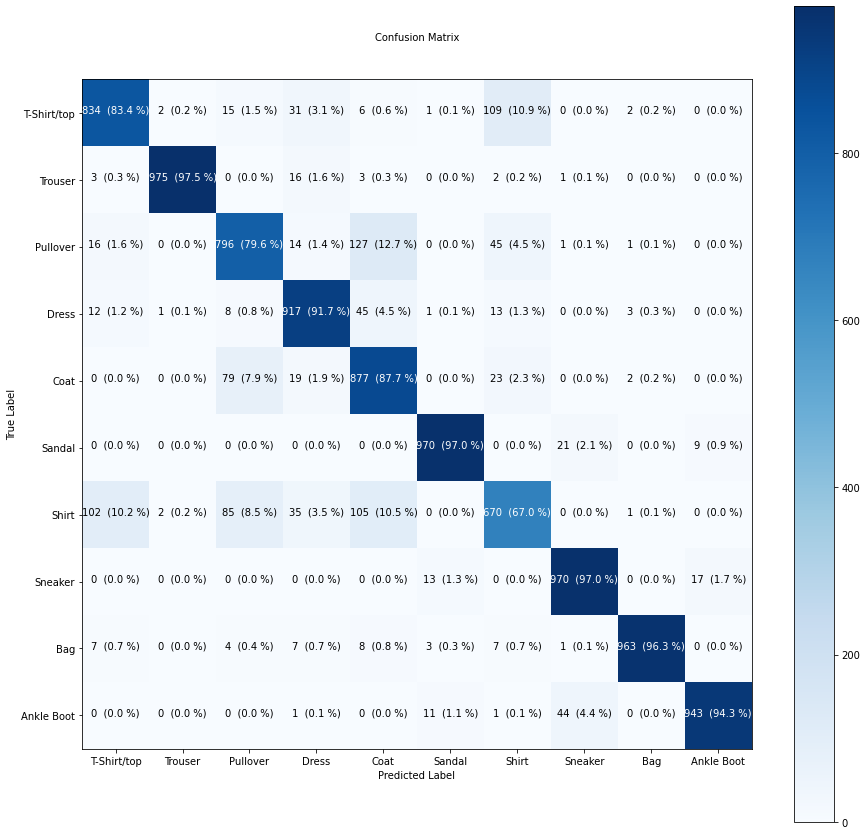

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true = test_labels,
                      y_pred = y_preds,
                      classes = class_names,
                      figsize = (15,15),
                      text_size = 10)

In [ ]:
precision = tf.keras.metrics.Precision()
precision.update_state(y_preds/10, test_labels/10)
p = precision.result().numpy()

In [ ]:

recall = recall_score(y_preds, test_labels,average="weighted")
precision = precision_score(y_preds, test_labels,average="weighted")
f1score = f1_score(y_preds, test_labels, average="weighted")


In [ ]:
print("The Precision score is: ", precision)
print("The Recall score is: ", recall)
print("The F1 score is: ", f1score)

The Precision score is:  0.8942708
The Recall score is:  0.8915
The F1 score is:  0.8918520163343632


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print("Evaluate on test data")
results = model.evaluate(test_data, test_labels, batch_size=128)
print("test loss, test acc:", results)


Evaluate on test data
79/79 [==============================] - 0s 5ms/step - loss: 0.3789 - accuracy: 0.8915
test loss, test acc: [0.3789193630218506, 0.8914999961853027]


In [ ]:
print("Evaluate on train data")
results1 = model.evaluate(train_data, train_labels, batch_size=128)
print("train loss, train acc:", results1)

Evaluate on train data
469/469 [==============================] - 2s 3ms/step - loss: 0.1604 - accuracy: 0.9378
train loss, train acc: [0.1603683978319168, 0.937833309173584]


[INFO] evaluating network...


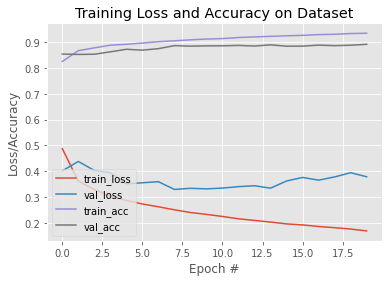

In [ ]:
# initialize the label names
labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

# make predictions on the test set
preds = model.predict(test_data)
# show a nicely formatted classification report
print("[INFO] evaluating network...")

# plot the training loss and accuracy
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")


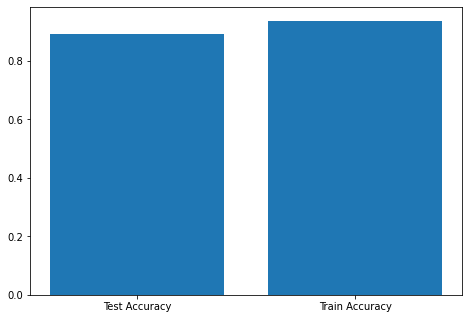

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
acc = ['Test Accuracy', 'Train Accuracy']
value = [results[1],results1[1]]
ax.bar(acc,value)
plt.show()